In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
DATA_PATH = f'{ROOT_PATH}/Dataset/spaceship'

In [3]:
train_df  = pd.read_csv(f'{DATA_PATH}/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


/tmp/ipykernel_2201315/1052868872.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot = True, cmap = 'Blues')


<Axes: >

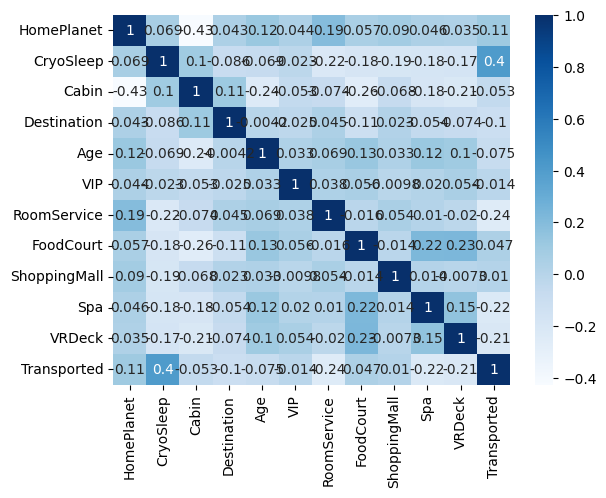

In [4]:
le                      = LabelEncoder()

train_df['HomePlanet']  = le.fit_transform(train_df['HomePlanet'])
train_df['CryoSleep']   = le.fit_transform(train_df['CryoSleep'])
train_df['Cabin']       = le.fit_transform(train_df['Cabin'])
train_df['Destination'] = le.fit_transform(train_df['Destination'])
train_df['VIP']         = le.fit_transform(train_df['VIP'])
train_df                = train_df.astype({'HomePlanet' : int, 'Transported' : 'int'})
 
sns.heatmap(train_df.corr(), annot = True, cmap = 'Blues')

In [5]:
train_df = train_df.drop(['PassengerId', 'Name'], axis = 1)
train_df = train_df.dropna()

X        = train_df.drop(['Transported'], axis = 1).values
y        = train_df['Transported'].values

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.25, stratify = y,
                                                      shuffle = True, random_state = 99)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7620 non-null   int64  
 1   CryoSleep     7620 non-null   int64  
 2   Cabin         7620 non-null   int64  
 3   Destination   7620 non-null   int64  
 4   Age           7620 non-null   float64
 5   VIP           7620 non-null   int64  
 6   RoomService   7620 non-null   float64
 7   FoodCourt     7620 non-null   float64
 8   ShoppingMall  7620 non-null   float64
 9   Spa           7620 non-null   float64
 10  VRDeck        7620 non-null   float64
 11  Transported   7620 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 773.9 KB


In [ ]:
svc = SVC()
svc.fit(train_x, train_y)

preds = svc.predict(train_x)
print(f'AUC score for train : {metrics.roc_auc_score(train_y, preds)}')
print(metrics.classification_report(train_y, preds))

AUC score for train : 0.7826271704356094
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2842
           1       0.74      0.89      0.80      2873

    accuracy                           0.78      5715
   macro avg       0.80      0.78      0.78      5715
weighted avg       0.80      0.78      0.78      5715



In [ ]:
preds = svc.predict(valid_x)
print(f'AUC score for valid : {metrics.roc_auc_score(valid_y, preds)}')
print(metrics.classification_report(valid_y, preds))

AUC score for valid : 0.7993779940169262
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       947
           1       0.75      0.91      0.82       958

    accuracy                           0.80      1905
   macro avg       0.81      0.80      0.80      1905
weighted avg       0.81      0.80      0.80      1905



In [ ]:
c_boost = CatBoostClassifier(iterations = 20, depth = 2, learning_rate = 0.5,
                             loss_function = 'Logloss', verbose = True)
c_boost.fit(train_x, train_y)

preds = c_boost.predict(train_x)
print(f'\n\nAUC score for train : {metrics.roc_auc_score(train_y, preds)}')
print(metrics.classification_report(train_y, preds))

0:	learn: 0.6096559	total: 49.7ms	remaining: 944ms
1:	learn: 0.5721377	total: 51.7ms	remaining: 465ms
2:	learn: 0.5478509	total: 56.8ms	remaining: 322ms
3:	learn: 0.5248530	total: 62.7ms	remaining: 251ms
4:	learn: 0.5095719	total: 66ms	remaining: 198ms
5:	learn: 0.5030631	total: 67.7ms	remaining: 158ms
6:	learn: 0.4967072	total: 69.3ms	remaining: 129ms
7:	learn: 0.4897399	total: 70.7ms	remaining: 106ms
8:	learn: 0.4839798	total: 72.2ms	remaining: 88.2ms
9:	learn: 0.4778044	total: 73.7ms	remaining: 73.7ms
10:	learn: 0.4747731	total: 74.7ms	remaining: 61.1ms
11:	learn: 0.4723736	total: 75.8ms	remaining: 50.5ms
12:	learn: 0.4685025	total: 76.9ms	remaining: 41.4ms
13:	learn: 0.4658527	total: 78.2ms	remaining: 33.5ms
14:	learn: 0.4622229	total: 79.7ms	remaining: 26.6ms
15:	learn: 0.4601834	total: 80.9ms	remaining: 20.2ms
16:	learn: 0.4579768	total: 82.5ms	remaining: 14.6ms
17:	learn: 0.4541488	total: 84.2ms	remaining: 9.35ms
18:	learn: 0.4522046	total: 86.1ms	remaining: 4.53ms
19:	learn: 0.

In [ ]:
preds = c_boost.predict(valid_x)
print(f'\n\nAUC score for valid : {metrics.roc_auc_score(valid_y, preds)}')
print(metrics.classification_report(valid_y, preds))



AUC score for valid : 0.809269685833519
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       947
           1       0.79      0.84      0.82       958

    accuracy                           0.81      1905
   macro avg       0.81      0.81      0.81      1905
weighted avg       0.81      0.81      0.81      1905

